In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [3]:
# Create an output directory to save results
output_dir = r"C:\Users\M. Faizan\Desktop\SE\6th\Saved"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
file_path = r"C:\Users\M. Faizan\Desktop\SE\6th\Saved/cleaned_and_featured_data.csv"
df = pd.read_csv(file_path)

Columns in dataset: Index(['datetime', 'subba', 'subba-name', 'parent', 'parent-name',
       'electricity_demand', 'value-units', 'temperature_2m', 'hour', 'day',
       'month', 'year', 'day_of_week', 'is_weekend', 'season'],
      dtype='object')


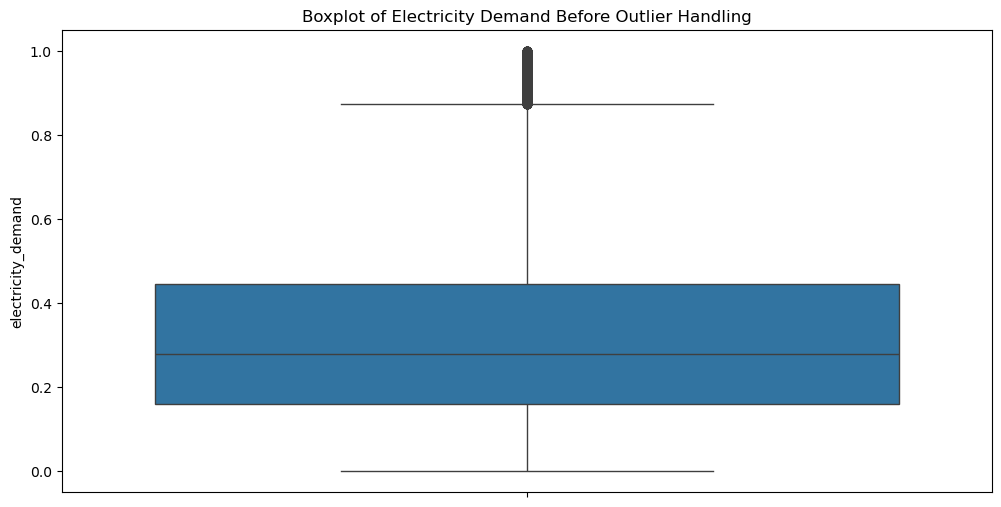

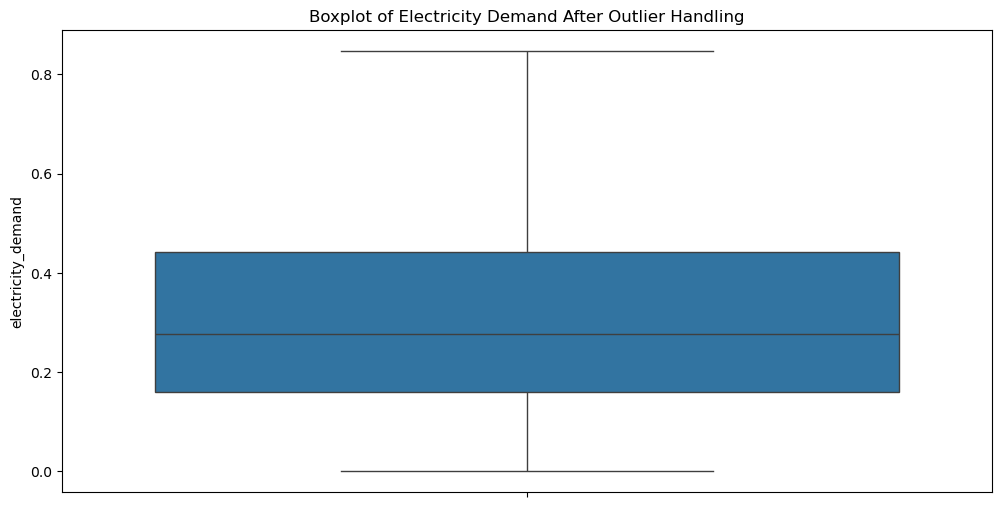

Outlier detection and handling completed. Results saved in: C:\Users\M. Faizan\Desktop\SE\6th\Saved


In [5]:
# Print column names for debugging
print("Columns in dataset:", df.columns)

# Ensure "datetime" is in datetime format
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# =================================
# 1. Outlier Detection and Handling
# =================================

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)], outliers

# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[abs(z_scores) > threshold].copy()
    outliers["z_score"] = (outliers[column] - mean) / std  # Save Z-score values
    return data[abs(z_scores) <= threshold], outliers

# Apply outlier detection and remove outliers
df_cleaned, outliers_iqr = detect_outliers_iqr(df, "electricity_demand")
df_cleaned, outliers_zscore = detect_outliers_zscore(df_cleaned, "electricity_demand")

# Save outlier reports
outliers_iqr.to_csv(os.path.join(output_dir, "outliers_iqr.csv"), index=False)
outliers_zscore.to_csv(os.path.join(output_dir, "outliers_zscore.csv"), index=False)

# Save cleaned dataset
df_cleaned.to_csv(os.path.join(output_dir, "cleaned_data_without_outliers.csv"), index=False)

# Before and After Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(y=df["electricity_demand"])
plt.title("Boxplot of Electricity Demand Before Outlier Handling")
plt.savefig(os.path.join(output_dir, "boxplot_before_outlier_handling.png"))
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(y=df_cleaned["electricity_demand"])
plt.title("Boxplot of Electricity Demand After Outlier Handling")
plt.savefig(os.path.join(output_dir, "boxplot_after_outlier_handling.png"))
plt.show()

print("Outlier detection and handling completed. Results saved in:", output_dir)